In [41]:
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
try:
    import seaborn as sns
    sns.set_context("poster")
    sns.set_style('whitegrid')
except:
    pass


fs = 24

plt.rc('font', size=fs)
plt.rc('axes', titlesize=fs)
plt.rc('axes', labelsize=fs)           
plt.rc('xtick', labelsize=fs)          
plt.rc('ytick', labelsize=fs)          
plt.rc('legend', fontsize=fs)   
plt.rc('figure', titlesize=fs) 



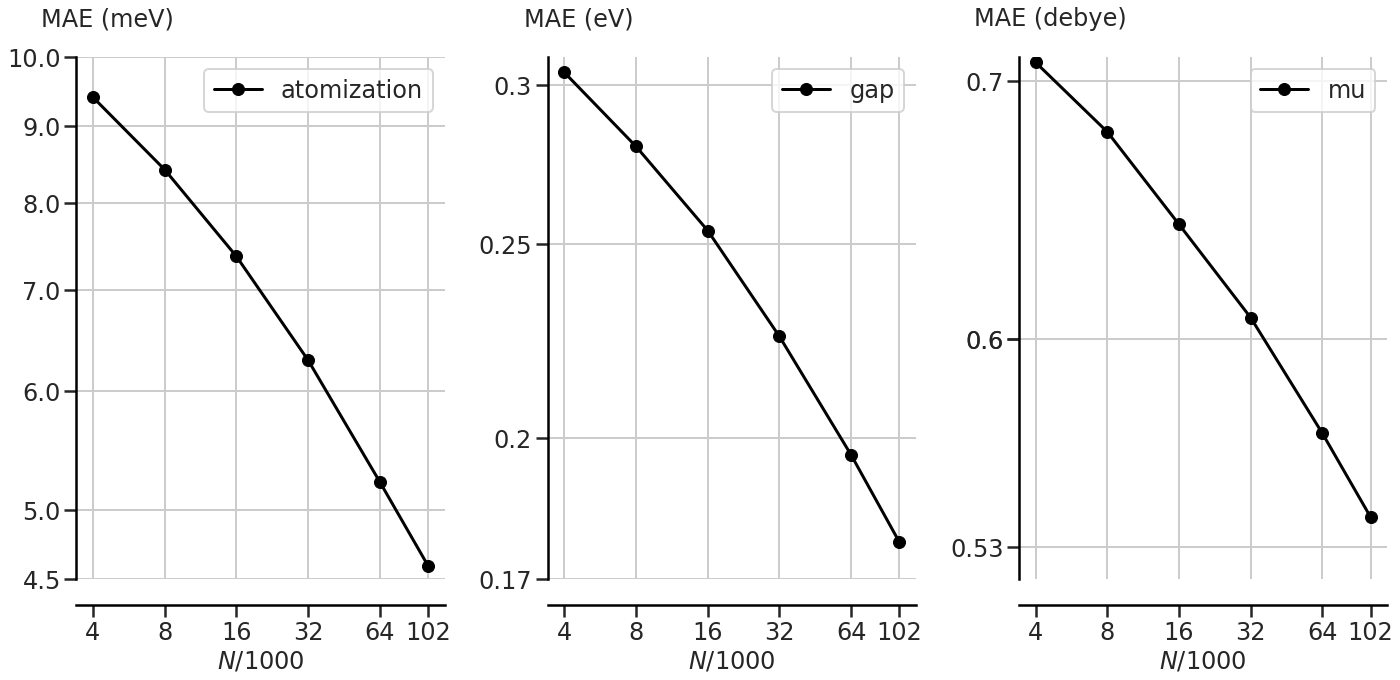

In [62]:
ML_PATH = "/store/common/jan/qm9_removed/ml/"
fig,(ax1, ax2,ax3)= plt.subplots(1,3, figsize=(20,10))

properties = ["atomization", "gap","mu"]

#np.array( [4000,8000, 16000, 32000,100000])

for p, ax in zip(properties, [ax1, ax2,ax3]):
    obj = pd.read_pickle(r"{}".format(ML_PATH)+'report_{}.pkl'.format(p))
    unit = obj["unit"]
    N, MAE = obj["lrn_crv"][0], obj["lrn_crv"][1]
    xticks = N
    ax.plot(N, MAE,  "o-", label="{}".format(p),color="black")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("$N/1000$", fontsize=fs)
    ax.set_ylabel("MAE ({})".format(unit), fontsize=fs, y=1.05, labelpad=-100, weight=500, rotation=0)
    ax.minorticks_off()
    ax.legend(loc="upper right", fontsize=fs)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('axes', -0.05))
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(xticks)
    ax.set_xticklabels(np.int_(xticks/1e3))

    if p=="gap":
        ax.set_ylim(0.17, 0.31)
        yticks = np.array([0.17, 0.2, 0.25, 0.3])
        ax.set_yticks(yticks)
        ax.set_yticklabels(np.round(yticks,2))

    if p == "atomization":
        ax.set_ylim(4.5*1e-3, 1e-2)
        yticks = np.array([4.5*1e-3, 5*1e-3, 6*1e-3, 7*1e-3, 8*1e-3, 9*1e-3, 1e-2])
        ax.set_yticks(yticks)
        ax.set_yticklabels(np.round(yticks*1e3,2))
        ax.set_ylabel("MAE (meV)", fontsize=fs, y=1.05, labelpad=-100, weight=500, rotation=0)

    if p == "mu":
        ax.set_ylim(0.52, 0.71)
        yticks = np.array([0.53, 0.6, 0.6, 0.7])
        ax.set_yticks(yticks)
        ax.set_yticklabels(np.round(yticks,2))
        
plt.tight_layout()
plt.savefig("/home/jan/projects/MOLOPT/do_sim/matching/results/quadratic/dist.pdf")